# Classificaion Template

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing and Visualization

In [3]:
# Reading the data
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Replacing and rempapping the column values for train and test dataframes
train['Gender'] = train['Gender'].fillna( train['Gender'].dropna().mode().values[0] )
train['Married'] = train['Married'].fillna( train['Married'].dropna().mode().values[0] )
train['Dependents'] = train['Dependents'].fillna( train['Dependents'].dropna().mode().values[0] )
train['Self_Employed'] = train['Self_Employed'].fillna( train['Self_Employed'].dropna().mode().values[0] )
train['LoanAmount'] = train['LoanAmount'].fillna( train['LoanAmount'].dropna().mean() )
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna( train['Loan_Amount_Term'].dropna().mode().values[0] )
train['Credit_History'] = train['Credit_History'].fillna( train['Credit_History'].dropna().mode().values[0] ).astype(np.int)
train['Dependents'] = train['Dependents'].str.rstrip('+')
train['Gender'] = train['Gender'].map({'Female':0,'Male':1}).astype(np.int)
train['Married'] = train['Married'].map({'No':0, 'Yes':1}).astype(np.int)
train['Education'] = train['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train['Self_Employed'] = train['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
train['Dependents'] = train['Dependents'].astype(np.int)

In [6]:
test['Gender'] = test['Gender'].fillna( test['Gender'].dropna().mode().values[0] )
test['Married'] = test['Married'].fillna( test['Married'].dropna().mode().values[0] )
test['Dependents'] = test['Dependents'].fillna( test['Dependents'].dropna().mode().values[0] )
test['Self_Employed'] = test['Self_Employed'].fillna( test['Self_Employed'].dropna().mode().values[0] )
test['LoanAmount'] = test['LoanAmount'].fillna( test['LoanAmount'].dropna().mean() )
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna( test['Loan_Amount_Term'].dropna().mode().values[0] )
test['Credit_History'] = test['Credit_History'].fillna( test['Credit_History'].dropna().mode().values[0] ).astype(np.int)
test['Dependents'] = test['Dependents'].str.rstrip('+')
test['Gender'] = test['Gender'].map({'Female':0,'Male':1}).astype(np.int)
test['Married'] = test['Married'].map({'No':0, 'Yes':1}).astype(np.int)
test['Education'] = test['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
test['Self_Employed'] = test['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
test['Dependents'] = test['Dependents'].astype(np.int)

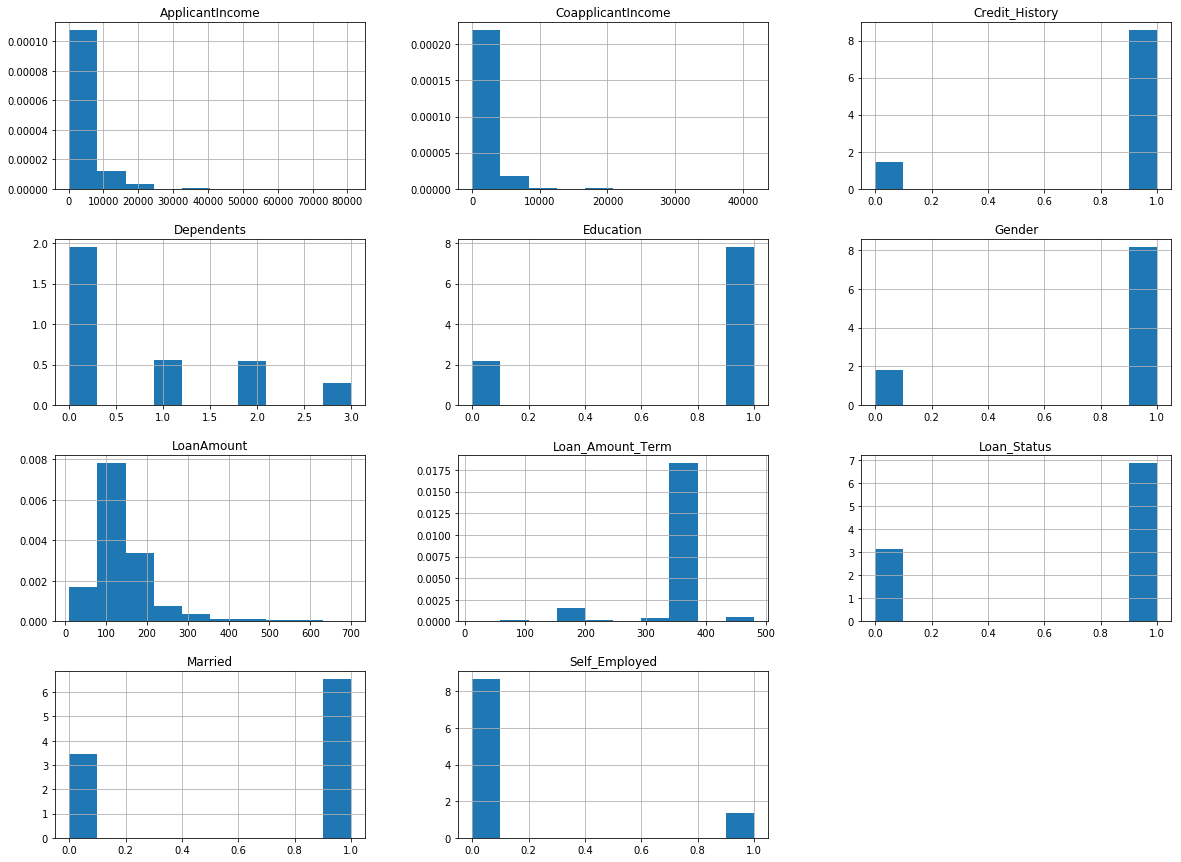

In [8]:
# Univariate graphs to see the distribution
train.hist(figsize=(20, 15))
plt.show()

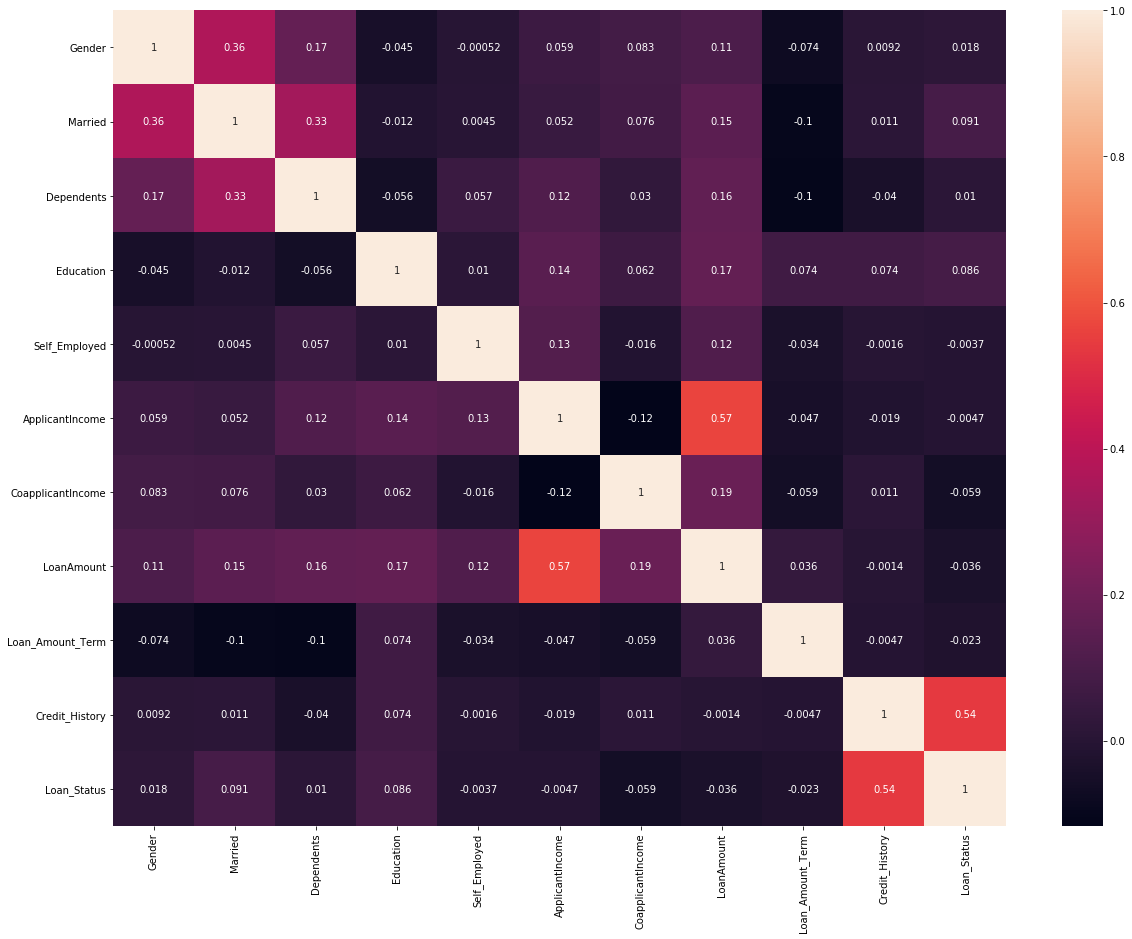

In [9]:
# Correlation Matrix
plt.subplots(figsize=(20, 15))
sns.heatmap(train.corr(), annot=True)

In [11]:
# Creating Dependent and Independent variables
X = train.iloc[:,1:-1]
y = train.iloc[:,-1]
X_cv = test.iloc[:,1:]

# Dummy Variables
X = pd.get_dummies(X, drop_first=True)
X_cv = pd.get_dummies(X_cv, drop_first=True)

In [12]:
# Spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
# Feature Scaling
from  sklearn.preprocessing  import StandardScaler

slc= StandardScaler()
X_train = slc.fit_transform(X_train)
X_cv = slc.transform(X_cv)
X_test = slc.transform(X_test)

In [14]:
# Test options and evaluation metric
num_folds = 10
seed = 0
scoring = 'accuracy'

## Applying Classification Models

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

# Spot-Check Algorithms (Classification)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Spot-Check Ensemble Models (Classification)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB',XGBClassifier()))

# evaluate each model in turn
results = {}
accuracy = {}
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results[name] = (cv_results.mean(), cv_results.std())
    model.fit(X_train, y_train)
    _ = model.predict(X_test)
    accuracy[name] = accuracy_score(y_test, _)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

## Parameter Tuning

In [33]:
# Parameter Tuning the Best Model from the results
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=seed)

params = {'penalty':['l2'], 'C':[0.1,0.05], 'solver':['newton-cg']}

grid_search = GridSearchCV(estimator = model ,param_grid = params,scoring=scoring ,cv =num_folds, verbose = 4) 
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] .. C=0.1, penalty=l2, solver=newton-cg, score=0.82, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV] .. C=0.1, penalty=l2, solver=newton-cg, score=0.84, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV]  C=0.1, penalty=l2, solver=newton-cg, score=0.8163265306122449, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV]  C=0.1, penalty=l2, solver=newton-cg, score=0.7959183673469388, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV]  C=0.1, penalty=l2, solver=newton-cg, score=0.8367346938775511, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-cg .............................
[CV]  C=0.1, penalty=l2, solver=newton-cg, score=0.8163265306122449, total=   0.0s
[CV] C=0.1, penalty=l2, solver=newton-c

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'C': [0.1, 0.05], 'solver': ['newton-cg']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=4)

In [34]:
# Best Score and Best Parameters from GridSearch
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.806517 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


## Final Model

             precision    recall  f1-score   support

          0       0.88      0.45      0.60        33
          1       0.83      0.98      0.90        90

avg / total       0.84      0.84      0.82       123



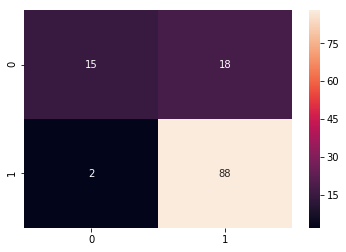

In [36]:
# Finalizing the model and comparing the test, predict results

model = LogisticRegression(random_state=seed, C = 0.1, penalty='l2', solver='newton-cg')

_ = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(classification_report(y_test, y_predict))

cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [37]:
results

{'LR': (0.8064897959183673, 0.06078384285197338),
 'LDA': (0.8064897959183673, 0.06078384285197338),
 'NB': (0.7861224489795917, 0.06281472196966738),
 'KNN': (0.7738367346938776, 0.06758928566614415),
 'CART': (0.6884081632653061, 0.05071096363282562),
 'SVM': (0.8023673469387755, 0.06602507317209318),
 'AB': (0.7718367346938775, 0.06194003629823288),
 'GBM': (0.7698367346938776, 0.05174005124617778),
 'ET': (0.7575510204081632, 0.042660384099441374),
 'RF': (0.7575918367346939, 0.04533165303825067),
 'XGB': (0.7779591836734694, 0.05600023799556736),
 'GScv': (0.8064897959183673, 0.06078384285197338)}

In [38]:
accuracy

{'LR': 0.8373983739837398,
 'LDA': 0.8373983739837398,
 'NB': 0.8292682926829268,
 'KNN': 0.7642276422764228,
 'CART': 0.6829268292682927,
 'SVM': 0.8211382113821138,
 'AB': 0.8292682926829268,
 'GBM': 0.7886178861788617,
 'ET': 0.7560975609756098,
 'RF': 0.7479674796747967,
 'XGB': 0.8130081300813008,
 'GScv': 0.8373983739837398}

In [ ]:
final_predictions = grid_search.predict(X_cv)

In [ ]:
submit = pd.read_csv("submission_example.csv")

In [ ]:
submit.medv = final_predictions

In [ ]:
submit.to_csv("my_submission.csv")